In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# cargar datos de data/merged_data_202407131635.csv
data = pd.read_csv('../data/merged_data_202407131635.csv', low_memory=False)
data.head()


,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams,...,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature
0,803,Reggaetón Lento (Bailemos),1,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Bolivia,top200,SAME_POSITION,6784.0,...,4.0,-3.073,0.0,0.0502,0.40000,0.000000,0.176,0.710,93.974,4.0
1,804,Otra vez (feat. J Balvin),2,2017-01-01,Zion & Lennox,https://open.spotify.com/track/3QwBODjSEzelZyV...,Bolivia,top200,SAME_POSITION,5748.0,...,10.0,-5.429,1.0,0.1000,0.05590,0.000486,0.440,0.704,96.016,4.0
2,805,Chantaje (feat. Maluma),3,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Bolivia,top200,SAME_POSITION,5506.0,...,8.0,-2.921,0.0,0.0776,0.18700,0.000030,0.159,0.907,102.034,4.0
3,806,Vente Pa' Ca (feat. Maluma),4,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Bolivia,top200,MOVE_UP,4804.0,...,11.0,-4.070,0.0,0.2260,0.00431,0.000017,0.101,0.533,99.935,4.0
4,807,Traicionera,5,2017-01-01,Sebastian Yatra,https://open.spotify.com/track/5J1c3M4EldCfNxX...,Bolivia,top200,MOVE_DOWN,4780.0,...,11.0,-4.933,1.0,0.0638,0.14200,0.000000,0.219,0.661,91.012,4.0


In [72]:
data_2 = data.copy()
data.shape

data[['streams']].describe()


,streams
count,313843.000000
mean,3731.006634
std,3543.268425
min,1001.000000
25%,1796.000000
50%,2629.000000
75%,4142.000000
max,81858.000000


In [57]:
data.columns

Index(['Unnamed: 0', 'title', 'rank', 'date', 'artist', 'url', 'region',
       'chart', 'trend', 'streams', 'track_id', 'album', 'popularity',
       'duration_ms', 'explicit', 'release_date', 'available_markets',
       'af_danceability', 'af_energy', 'af_key', 'af_loudness', 'af_mode',
       'af_speechiness', 'af_acousticness', 'af_instrumentalness',
       'af_liveness', 'af_valence', 'af_tempo', 'af_time_signature'],
      dtype='object')

In [58]:
# drop these columns region, chart, available_markets, url
data = data.drop(columns=['region', 'chart', 'available_markets', 'url', 'release_date'])

data.columns

Index(['Unnamed: 0', 'title', 'rank', 'date', 'artist', 'trend', 'streams',
       'track_id', 'album', 'popularity', 'duration_ms', 'explicit',
       'af_danceability', 'af_energy', 'af_key', 'af_loudness', 'af_mode',
       'af_speechiness', 'af_acousticness', 'af_instrumentalness',
       'af_liveness', 'af_valence', 'af_tempo', 'af_time_signature'],
      dtype='object')

In [59]:
print(data.isnull().sum())


Unnamed: 0                 0
title                      0
rank                       0
date                       0
artist                     0
trend                      0
streams                90664
track_id                2482
album                   2501
popularity              2482
duration_ms             2482
explicit                2482
af_danceability         2482
af_energy               2482
af_key                  2482
af_loudness             2482
af_mode                 2482
af_speechiness          2482
af_acousticness         2482
af_instrumentalness     2482
af_liveness             2482
af_valence              2482
af_tempo                2482
af_time_signature       2482
dtype: int64


In [60]:
print(data.isna().sum())

Unnamed: 0                 0
title                      0
rank                       0
date                       0
artist                     0
trend                      0
streams                90664
track_id                2482
album                   2501
popularity              2482
duration_ms             2482
explicit                2482
af_danceability         2482
af_energy               2482
af_key                  2482
af_loudness             2482
af_mode                 2482
af_speechiness          2482
af_acousticness         2482
af_instrumentalness     2482
af_liveness             2482
af_valence              2482
af_tempo                2482
af_time_signature       2482
dtype: int64


In [61]:
# drop rows with missing values for columns starting with af_

af_columns = [col for col in data.columns if col.startswith('af_')]

data = data.dropna(subset=af_columns)

data.shape

(402031, 24)

In [62]:
print(data.isnull().sum())

Unnamed: 0                 0
title                      0
rank                       0
date                       0
artist                     0
trend                      0
streams                88188
track_id                   0
album                     19
popularity                 0
duration_ms                0
explicit                   0
af_danceability            0
af_energy                  0
af_key                     0
af_loudness                0
af_mode                    0
af_speechiness             0
af_acousticness            0
af_instrumentalness        0
af_liveness                0
af_valence                 0
af_tempo                   0
af_time_signature          0
dtype: int64


In [63]:
print(data.isna().sum())


Unnamed: 0                 0
title                      0
rank                       0
date                       0
artist                     0
trend                      0
streams                88188
track_id                   0
album                     19
popularity                 0
duration_ms                0
explicit                   0
af_danceability            0
af_energy                  0
af_key                     0
af_loudness                0
af_mode                    0
af_speechiness             0
af_acousticness            0
af_instrumentalness        0
af_liveness                0
af_valence                 0
af_tempo                   0
af_time_signature          0
dtype: int64


In [64]:
data.dtypes

Unnamed: 0               int64
title                   object
rank                     int64
date                    object
artist                  object
trend                   object
streams                float64
track_id                object
album                   object
popularity             float64
duration_ms            float64
explicit                object
af_danceability        float64
af_energy              float64
af_key                 float64
af_loudness            float64
af_mode                float64
af_speechiness         float64
af_acousticness        float64
af_instrumentalness    float64
af_liveness            float64
af_valence             float64
af_tempo               float64
af_time_signature      float64
dtype: object

In [65]:
# convertir la columna 'date' a datetime
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

# check for missing values

print(data.isnull().sum())
print(data.isna().sum())

Unnamed: 0                 0
title                      0
rank                       0
date                       0
artist                     0
trend                      0
streams                88188
track_id                   0
album                     19
popularity                 0
duration_ms                0
explicit                   0
af_danceability            0
af_energy                  0
af_key                     0
af_loudness                0
af_mode                    0
af_speechiness             0
af_acousticness            0
af_instrumentalness        0
af_liveness                0
af_valence                 0
af_tempo                   0
af_time_signature          0
dtype: int64
Unnamed: 0                 0
title                      0
rank                       0
date                       0
artist                     0
trend                      0
streams                88188
track_id                   0
album                     19
popularity                 0
d

In [66]:
data.shape

(402031, 24)

# HIPOTESIS

Todos los audio_fetures (similaridad), streams (frencuencia de escucha) y popularidad de la cancion estan relacionados. 
Probablemente: popularity

Variable Y = 
Opcion 1:

Popularidad de la cancion, 0 - 5, Score? 

Opcion 2:
0 o 1

Variables X = audio_features, streams


# Univariado


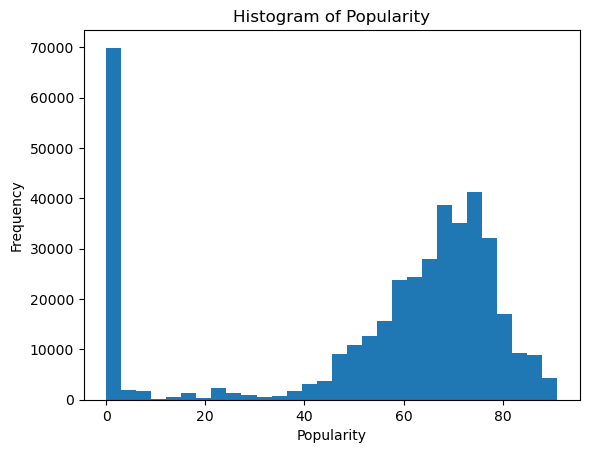

In [67]:
# plot a histogram of the column 'popularity'

plt.hist(data['popularity'], bins=30)

plt.xlabel('Popularity')

plt.ylabel('Frequency')

plt.title('Histogram of Popularity')

plt.show()

# Bivariado

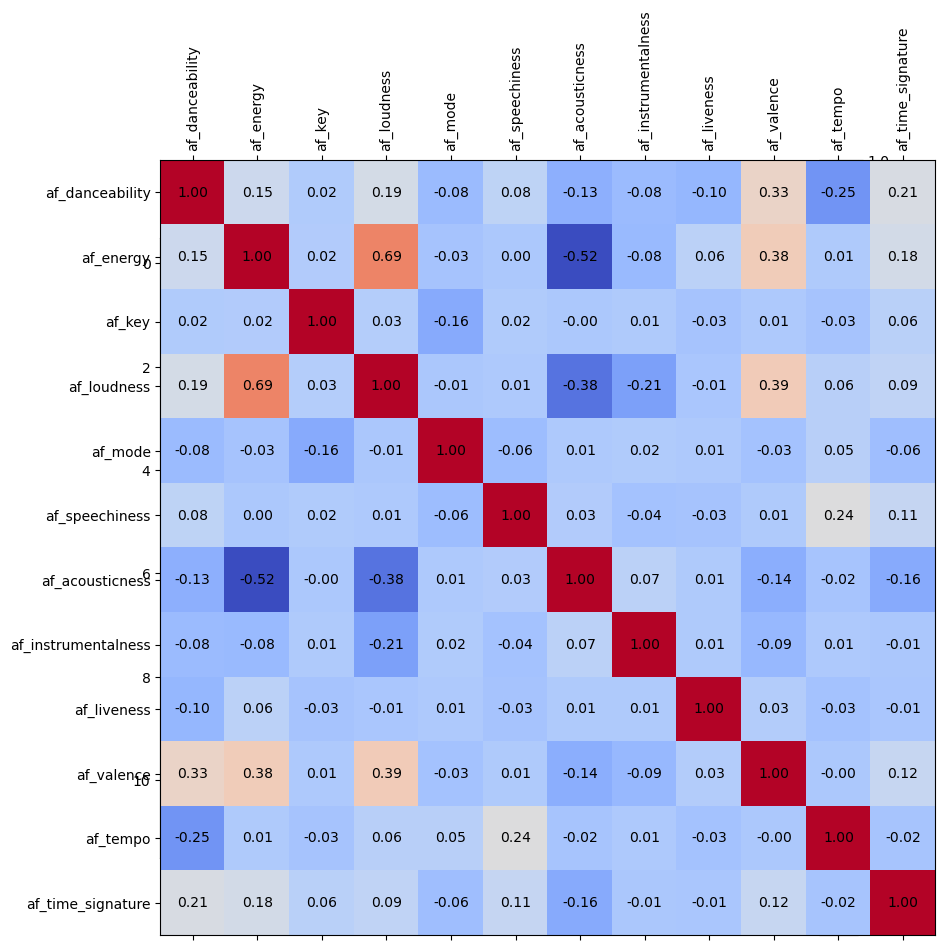

In [68]:
# filter columns starting with 'af_'

af_columns = [col for col in data.columns if col.startswith('af_')]

# do a correlation matrix of these columns using pearson correlation

correlation_matrix = data[af_columns].corr(method='pearson')

# plot a heatmap of the correlation matrix

plt.figure(figsize=(10, 10))
plt.matshow(correlation_matrix, fignum=1)


plt.colorbar()

plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')

plt.xticks(range(len(af_columns)), af_columns, rotation='vertical')

plt.yticks(range(len(af_columns)), af_columns)

# put annotations with the numbers

for i in range(len(af_columns)):
    for j in range(len(af_columns)):
        plt.text(i, j, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center')
      
plt.show()



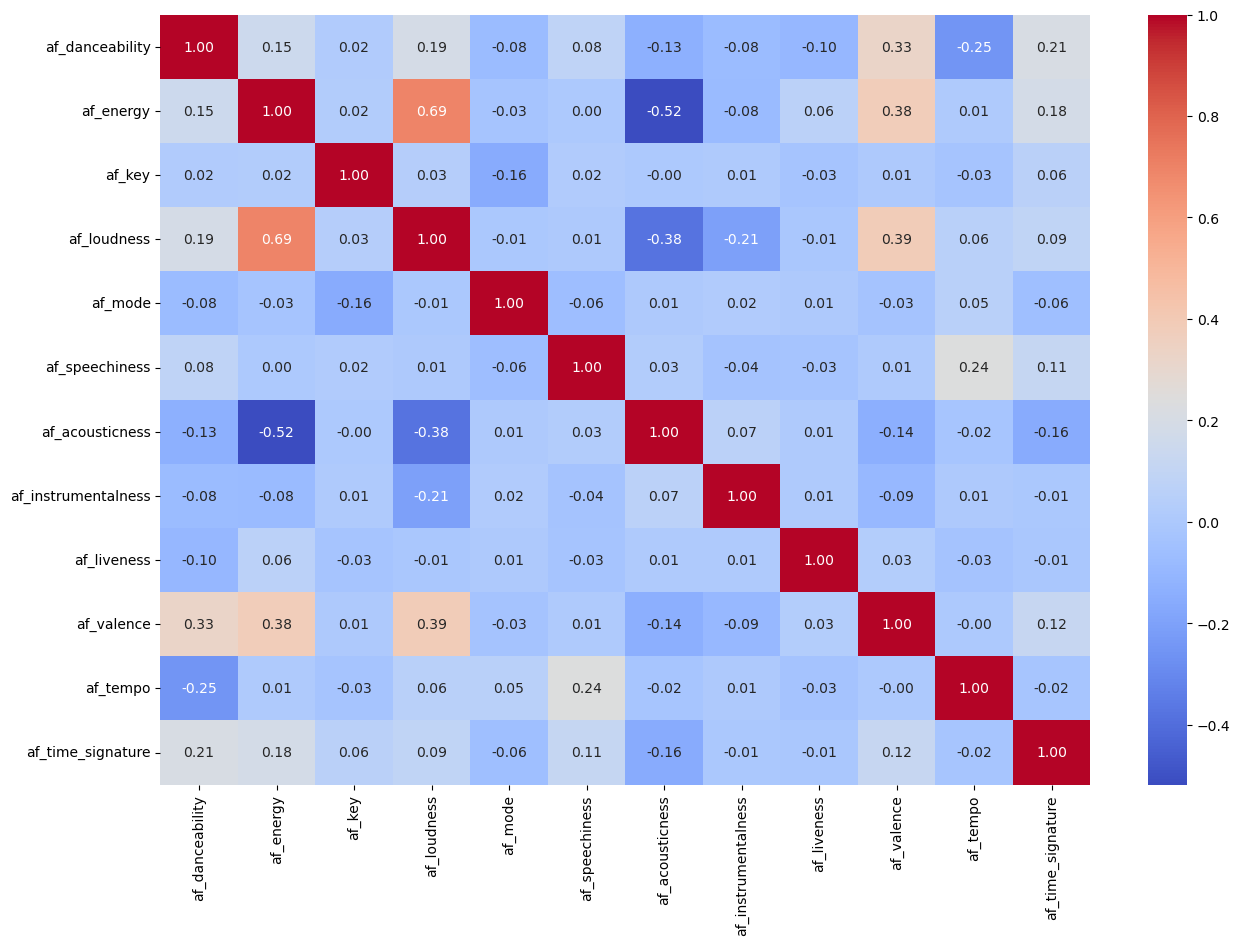

In [71]:
# use seaborn to plot a heatmap of the correlation matrix

import seaborn as sns

plt.figure(figsize=(15, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.show()

In [70]:
# 